In [9]:
from keras_facenet import FaceNet
import numpy as np
import os

import matplotlib.pyplot as plt
import cv2 

# check if there is a GPU available
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [9]:
"""
idea per il training

Embeddings path: ./LFW/embeddings

Estraiamo gli embeddings, li salviamo in un file e li usiamo per il training in un secondo momento.
Il nostro classificatore sarà un classificatore binario, che confronterà due embeddings e dirà se fanno parte della stessa persona.

Faccia1 -> FaceNet - 
                    | 
                    -> Training di un classificatore binario -> 0/1
                    |
Faccia2 -> FaceNet -

Come strutturare il trainig?

1) Col dataset che abbiamo costruito nell'altro notebook, manteniamo la struttura, salviamo gli embeddings e salviamo il tutto dentro un file .npy (così da evitare di dover fare sempre la stessa computazione)
2) Con un ciclo for in range(mini batch), facciamo la fit del classificatore binario. Come loss function usiamo la cross entropy, come ottimizzatore usiamo l'adam.


"""

"\nidea per il training\n\nEmbeddings path: ./LFW/embeddings\n\nEstraiamo gli embeddings, li salviamo in un file e li usiamo per il training in un secondo momento.\nIl nostro classificatore sarà un classificatore binario, che confronterà due embeddings e dirà se fanno parte della stessa persona.\n\nFaccia1 -> FaceNet - \n                    | \n                    -> Training di un classificatore binario -> 0/1\n                    |\nFaccia2 -> FaceNet -\n\nCome strutturare il trainig?\n\n1) Col dataset che abbiamo costruito nell'altro notebook, manteniamo la struttura, salviamo gli embeddings e salviamo il tutto dentro un file .npy (così da evitare di dover fare sempre la stessa computazione)\n2) Con un ciclo for in range(mini batch), facciamo la fit del classificatore binario. Come loss function usiamo la cross entropy, come ottimizzatore usiamo l'adam.\n\n\n"

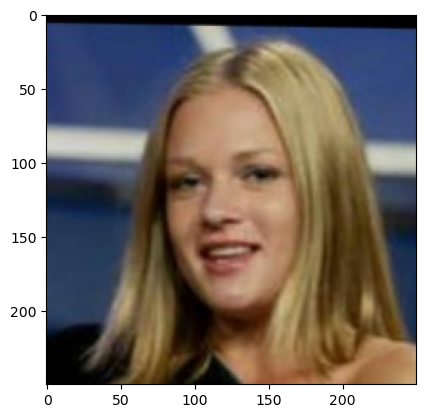

(250, 250, 3)


In [10]:
embedder = FaceNet()

path = "./LFW/lfw_funneled/AJ_Cook/AJ_Cook_0001.jpg" #this is the image
image = cv2.imread(path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


plt.imshow(image)
plt.show()

#print the shape of the image
print(image.shape)

In [13]:

from IPython.utils import io
with io.capture_output() as captured:

    detections = embedder.extract(image, threshold=0.95)
    #print the shape of image



    print(detections)       #for every detected face, it returns a dict with the bounding box, keypoints and the embedding

    #draw the bounding box and the keypoints
    for detection in detections:
        
        #boxCoordinates 
        box = detection['box']
        x1, y1, width, height = box
        x2, y2 = x1 + width, y1 + height

        #keypoints
        keypoints = detection['keypoints']
        left_eye, right_eye, nose, mouth_left, mouth_right = keypoints['left_eye'], keypoints['right_eye'], keypoints['nose'], keypoints['mouth_left'], keypoints['mouth_right']

        #draw the bounding box
        cv2.rectangle(image, (x1, y1), (x2, y2), (0,0,255), 1)

        #draw the keypoints
        cv2.circle(image, left_eye, 2, (0,155,255), 2)
        cv2.circle(image, right_eye, 2, (0,155,255), 2)
        cv2.circle(image, nose, 2, (0,155,255), 2)
        cv2.circle(image, mouth_left, 2, (0,155,255), 2)
        cv2.circle(image, mouth_right, 2, (0,155,255), 2)

    plt.imshow(image)
    plt.show()

: 

In [ ]:
embeddings = embedder.embeddings([image])       #già cropped.
print(embeddings)